# Result Analysis : 

## 1. Model : Best model


38/38 [==============================] - 0s 549us/step - loss: 0.6469 - mae: 0.6469 - mse: 0.9454


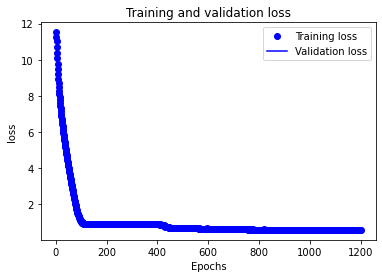

In [148]:
#big model 의 경우 모델의 사이즈가 커서 Overfitting 이 발생 (Big model showed overfitting due to its large hidden layers)
#모델 사이즈를 줄여서 best model 에 도달할 수 있었음 (Reached best model with smaller size)
#local optima 를 극복하기 위해서 tanh 를 사용하였음 (Utilized tanh to overcome local optima)
#Relu 만 사용할 때 보다 훨씬 속도가 빠름 (Tanh was much faster in learning compared to Relu)
model2 = keras.Sequential(
    [
        layers.Dense(4, activation="relu", input_dim=len(data_X.columns)),
        layers.Dense(8,activation="relu"),
        layers.Dense(8,activation="tanh"),
        layers.Dense(8,activation="tanh"),
        layers.Dense(1,activation="linear"),
    ]
)

small_model_performance=model_compile(model2, epoch=1200, loss='mae')

#데이터가 많아지니 확실히 hidden layer 가 줄어들어야함 (The performance was better since the parameter decreased)
#데이터 전처리 진행하지 않을시 loss 가 0.05 이상 높았음 (When the data was not properly preprocessed, the loss was higher for more than 0.05) 

In [61]:
print(small_model_performance)
#최대 0.62 mae 의 성적  (Best performance was 0.62)

(0.6635311841964722, <tensorflow.python.keras.callbacks.History object at 0x7fd89c297340>)


In [149]:
def to_origin(data):
    return np.exp(data)-1
#이 모델로 실제 고객별로 예측해보았습니다.(Prediction table for each customers)
yhat_test=to_origin(model2.predict(data_X))
Y_test_origin=to_origin(Y_test)

yhat_test=to_origin(model2.predict(X_test))
Y_test_origin=to_origin(Y_test)
result_small_model=pd.DataFrame({'prediction': yhat_test.flatten(), 'True_value':Y_test_origin})
result_small_model['error']=np.abs(result_small_model['True_value']-result_small_model['prediction'])
result_small_model['error_rate']=result_small_model['True_value']/result_small_model['prediction']


In [150]:
#각 고객에 대해서 예측한 값과 실제값 입니다. (The table under is the prediction result of model and the real value)
#해당 결과를 시각화 시 실제 평균 오차 등을 확인 할 수 있습니다. (Real error can be calculated using the table below)
#Error rate 이란 실제값이 예측치 대비 얼마나 큰지 (몇배나 큰지, 실제값/예측값)임  
#실제 값보다 평균적으로 약 8만원 정도 낮게 예측했음을 알 수 있습니다. (Compared to real value the model returned on average 800 thousand KRW
result_small_model.describe()

,prediction,True_value,error,error_rate
count,1.190000e+03,1.190000e+03,1.190000e+03,1190.000000
mean,1.727677e+05,8.426502e+07,8.416361e+07,121.130611
std,1.466376e+05,2.898900e+09,2.898882e+09,4129.673010
min,1.096365e+03,1.000000e+03,1.284375e+01,0.007448
25%,7.646831e+04,5.887000e+04,2.310629e+04,0.616416
50%,1.249462e+05,1.315370e+05,5.000723e+04,0.955093
75%,2.253172e+05,2.399288e+05,1.061218e+05,1.486241
max,1.401274e+06,1.000018e+11,1.000011e+11,142460.142605


# 2. Plotting Result

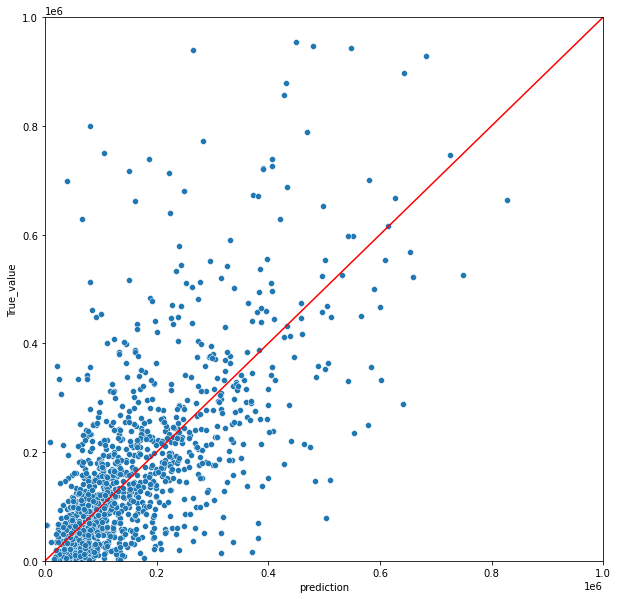

In [209]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=result_small_model,x='prediction', y='True_value')
plt.xlim(0,1000000)
plt.ylim(0,1000000)
x=np.linspace(0,1000000)
y=x
plt.plot(x, y, '-r', label='y=x')
plt.show()

In [169]:
#각 고객별로 구매 가격에 따라서 Grouping 을 진행하였습니다.
#Grouping 진행시 실제 정확한 그룹에 들어갔는지 확인 하여 model 의 accuracy 를 볼 수 있었습니다.
result_small_model.loc[result_small_model['prediction']<100000, 'predicted_level']=0
result_small_model.loc[result_small_model['prediction']>=100000, 'predicted_level']=1
result_small_model.loc[result_small_model['prediction']>=250000, 'predicted_level']=2
result_small_model.loc[result_small_model['prediction']>=500000, 'predicted_level']=3
result_small_model.loc[result_small_model['prediction']>=800000, 'predicted_level']=4
result_small_model.loc[result_small_model['prediction']>=1500000, 'predicted_level']=5



In [170]:
result_small_model.loc[result_small_model['True_value']<100000, 'real_level']=0
result_small_model.loc[result_small_model['True_value']>=100000, 'real_level']=1
result_small_model.loc[result_small_model['True_value']>=250000, 'real_level']=2
result_small_model.loc[result_small_model['True_value']>=500000, 'real_level']=3
result_small_model.loc[result_small_model['True_value']>=800000, 'real_level']=4
result_small_model.loc[result_small_model['True_value']>=1500000, 'real_level']=5


In [532]:
result_small_model['correct']=0
result_small_model.loc[result_small_model['predicted_level']==result_small_model['real_level'], 'correct']=1

In [174]:
print(sklearn.metrics.classification_report(result_small_model['predicted_level'], result_small_model['real_level']))

              precision    recall  f1-score   support

         0.0       0.69      0.73      0.71       455
         1.0       0.62      0.54      0.58       490
         2.0       0.46      0.44      0.45       201
         3.0       0.24      0.33      0.28        36
         4.0       0.09      0.29      0.14         7
         5.0       0.00      0.00      0.00         0

    accuracy                           0.59      1189
   macro avg       0.35      0.39      0.36      1189
weighted avg       0.60      0.59      0.59      1189



# 3. Best model analysis

## 1) Model 

### (1) Model structure

- 1.변수가 추가될 수록 모델은 가벼워질때 높은 성능을 나타냈다. (As the features are added, number of parameter should be cut down in order to avoid overfitting)
- 2. 전처리, 이상치를 제거할 시 성능이 점차 높아짐을 확인할 수 있었다 (Preprocessing and deleting outliers was important in performance)
    + 특히 과도하게 높은 구매금액, 이상치 : 구매금액 0 등 (Especially transaction with too high or too low volume)
- 3. Relu 를 이용시 Local optima 에서 빠져나오지 못하는 모습 확인 : Tanh 를 이용해 학습 속도를 높일 수 있었다. (DNN formulated with only Relu was not enough to get out of local optima : needed to used tanh to increase learning speed)

In [545]:
model2.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_152 (Dense)            (None, 4)                 316       
_________________________________________________________________
dense_153 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_154 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_155 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 9         
Total params: 509
Trainable params: 509
Non-trainable params: 0
_________________________________________________________________


### (2) Learning Curve

- 총 4단계로 나눠볼 수 있었음 (Total 4 phase in learning)
- 1단계(1st phase) : 급격한 loss 감소 (Drastic decrease in loss)
- 2단계(2nd phase) : Saddle point
- 3단계(3rd phase) : Saddle point 극복(Overcome)
- 4단계(4th phase) : Overfitting 시작 (Start)

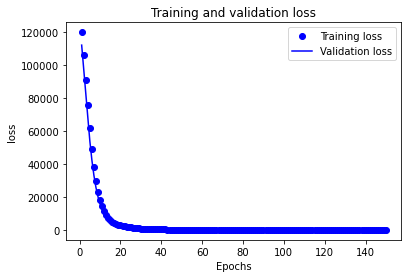

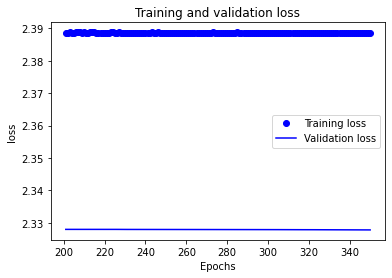

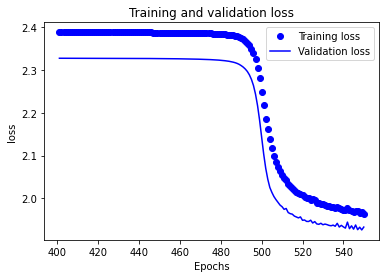

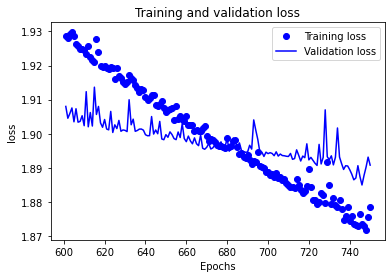

In [563]:
start=[0,200,400,600]
for from_epoch in start:
    history=small_model_performance[1]
    history_dict=history.history
    loss_values=np.exp(history_dict['loss'][from_epoch:from_epoch+150])
    val_loss_values=np.exp(history_dict['val_loss'][from_epoch:from_epoch+150])
    epochs=range(1+from_epoch, from_epoch+151)
    
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.show()


## 2) 고객 행동 예측에 관한 설명

### (1) 모델의 행동 예측 성과

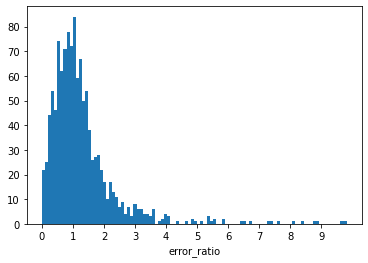

In [413]:
#약 50% 의 고객이 실제 가격에 65~150% 로 예측할 수 있었다. 
#(The model returned around 65~150% of real value for 50% of the total customers)
#그 외에 갑작스러운 행동 : 갑자기 구매를 적게 함, 갑작스럽게 많은 구매를 하는 것 등으로 예측이 어려웠다. 
#Sudden change in customer behaviors was difficult to predict
#더욱 디테일한 예측을 위해서는 상세한 행동 패턴을 확인할 수 있는 앱데이터, 개인적인 정보(성별, 연령, 가입일 등) 이 필요하다.
#For further detailed prediction, app behavioral log data and cohort data(Age, date signed up) are needed
plt.hist(result_small_model.loc[result_small_model['error_rate']<10, 'error_rate'], bins=100)
plt.xticks(ticks=range(0,10))
plt.xlabel('error_ratio')
plt.show()
#Below is the histogram for error ratio of each customer

In [424]:
result_small_model['error_rate'].describe()

count    1190.000000
mean        1.856149
std        14.464221
min         0.009189
25%         0.652982
50%         1.046255
75%         1.550645
max       496.458338
Name: error_rate, dtype: float64

### (2) 실제 과소/과대 평가된 고객 행동 예시 : 

특히 고객 중 갑작스러운 행동 변화가 있는 경우 가장 예측하기 어려웠다.

In [425]:

#과소 평가된 고객은 누구였을까? (Who were Underestimate?)
overpredicted_client=data.loc[data_X.index.isin(result_small_model[result_small_model['error_rate']> 10].index), "clnt_id"].values
overpredicted_trans=trans[trans['clnt_id'].isin(overpredicted_client)]
overpredicted_trans.groupby('clnt_id').sum()['total_price']
#Top underestimated customers were those who purchased 

clnt_id
3473      8342643
9678     34024070
17422      577064
17664    10028550
23902     2868390
25934       77440
33024      672635
38003      918592
43136      424985
45814      152760
47702      632938
54030      540332
57350      886888
71623      329178
71903      526571
72254     1547110
Name: total_price, dtype: int64

/home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


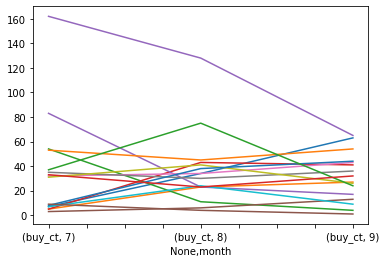

In [456]:
#이들을 왜 잘못 예측했을까 ? 
#Why were they underestimate?

# 가설 1. 이들이 갑작스럽게 9월에 다른 행동을 했다. 
#Hypothesis1. They may have acted different in september compared to other months
overpredicted_client=data.loc[data_X.index.isin(result_small_model[result_small_model['error_rate']> 10].index), "clnt_id"].values
overpredicted_trans=trans[trans['clnt_id'].isin(overpredicted_client)]
overpredicted_trans.groupby('clnt_id').sum()['total_price']
df=pd.pivot_table(overpredicted_trans[['clnt_id','buy_ct', 'month','biz_unit']], columns=['month'], index='clnt_id', aggfunc='sum')
df=df.T
fig=df.plot()
fig.get_legend().remove()
#1) 구매 개수의 변화 (Change in number of products puchased):
#실제로 7,8,9 월의 구매 개수를 볼 때 160 -> 120 -> 60 등 격하게 떨어지고 있음을 확인 할 수 있다.
#(Graph shows that the number of products are actually decreasing heavily - note that x axis range is wide)
#고객의 세세한 패턴 변화까지 예측할 수 있는 모델이 필요하다. (We need a model that can predict change in pattern)

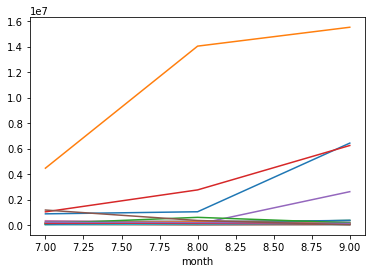

In [457]:
#2) 구매 가격의 변화 : 구매 가격이 급증한 고객들 또한 잡아내지 못함 
#(Also the abrupt change in transaction volume was not captured)
overpredicted_client=data.loc[data_X.index.isin(result_small_model[result_small_model['error_rate']> 10].index), "clnt_id"].values
overpredicted_trans=trans[trans['clnt_id'].isin(overpredicted_client)]
overpredicted_trans.groupby('clnt_id').sum()['total_price']
df=pd.pivot_table(overpredicted_trans, columns='month', index='clnt_id', aggfunc='sum')['total_price']
df=df.T
fig=df.plot()
fig.get_legend().remove()

## 3) Feature importance

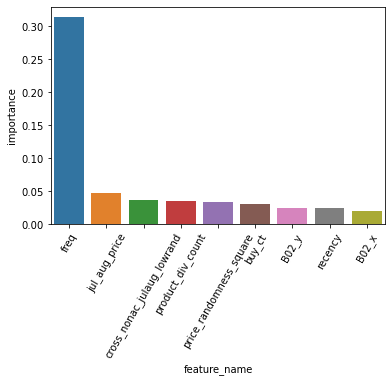

In [783]:
#Feature important analysis

#구매 빈도, 7,8월 총 구매 금액, non active group의 7,8월 구매 금액 (cross feature), 거래금액의 랜덤성, 고객 거래의 recency가 중요
#Frequency of transaction, total volume during July and August, Non active group's transaction volumne
#Randomness of transaction volume, Recency of the customer purchase were important in prediction
values=rf.feature_importances_
indexes=list(data_X_raw.columns)
feat_importance=pd.DataFrame({'feature_name':indexes, 'importance':values})
top=feat_importance.sort_values(by='importance', ascending=False).head(9)
sns.barplot(x=top['feature_name'], y=top['importance'])
plt.xticks(rotation=60)
plt.show()

<AxesSubplot:>

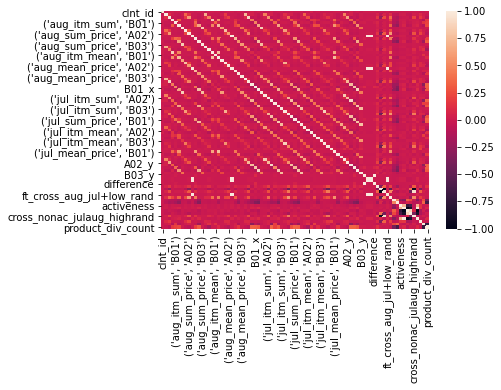

In [789]:
#Correlation analysis
sns.heatmap(data.corr())

In [795]:
#각 채널에서의 거래량, 각 채널에서의 거래빈도수, 총 거래 빈도수가 9월 구매액과 깊은 연관 있음
#Similar result : Transaction volumne, total frequency was relevant to the target variable
# (difference 는 feature가 아님 - Difference is not a feature)
np.abs(data.corr()['sep_sum_price']).sort_values(ascending=False).head(10)

sep_sum_price           1.000000
difference              0.999994
B01_x                   0.093957
B01_y                   0.072678
(jul_sum_price, B01)    0.048466
(aug_sum_price, B01)    0.039723
(aug_itm_sum, B01)      0.026879
(jul_itm_sum, B01)      0.019801
freq                    0.017062
product_div_count       0.017050
Name: sep_sum_price, dtype: float64